<a href="https://colab.research.google.com/github/AmiRiahi/Amir-GoMyCode/blob/master/ProjetGMC_PL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv("E0_17.txt")

In [46]:
df.tail()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 65,Unnamed: 66,Unnamed: 67
175,175,E0,16/12/17,Stoke,West Ham,0,3,A,0,1,A,G Scott,17,14,0,7,12,13,7,9,2,1,0,0,2.29,3.29,3.50,2.20,3.3,3.40,2.20,3.3,3.40,2.20,3.20,3.30,2.31,3.35,3.46,2.30,3.3,3.30,2.30,3.3,3.40,35,2.33,2.26,3.40,3.28,3.55,3.38,33,2.15,2.08,1.80,1.75,21,-0.25,2.00,1.94,1.98,1.93,2.46,3.26,3.26,NaN,NaN,NaN
176,176,E0,16/12/17,Watford,Huddersfield,1,4,A,0,2,A,M Oliver,13,15,3,9,12,17,8,7,2,1,1,1,1.80,3.75,5.00,1.72,3.7,5.00,1.75,3.7,4.70,1.75,3.50,4.75,1.79,3.78,5.08,1.80,3.5,5.00,1.75,3.8,5.25,35,1.81,1.76,3.85,3.67,5.25,4.87,33,2.10,2.03,1.85,1.80,20,-0.75,2.04,1.98,1.95,1.88,1.73,3.83,5.50,NaN,NaN,NaN
177,177,E0,17/12/17,Bournemouth,Liverpool,0,4,A,0,3,A,A Marriner,6,21,2,7,5,10,2,3,1,1,0,0,6.50,4.50,1.53,6.25,4.6,1.48,6.20,4.0,1.55,6.00,4.33,1.50,6.65,4.81,1.51,6.00,4.5,1.53,6.50,4.6,1.50,35,6.65,6.27,4.81,4.52,1.55,1.50,32,1.61,1.57,2.56,2.41,21,1.00,2.13,2.08,1.84,1.80,7.35,5.25,1.44,NaN,NaN,NaN
178,178,E0,17/12/17,West Brom,Man United,1,2,A,0,2,A,A Taylor,12,8,5,3,14,7,6,3,1,3,0,0,6.50,4.00,1.60,6.00,4.0,1.57,6.20,4.0,1.55,6.00,3.70,1.60,6.35,4.09,1.62,6.50,3.8,1.62,6.50,4.0,1.60,35,6.50,6.11,4.10,3.90,1.64,1.60,33,2.15,2.07,1.81,1.76,19,0.75,2.20,2.12,1.81,1.77,6.00,3.75,1.70,NaN,NaN,NaN
179,179,E0,18/12/17,Everton,Swansea,3,1,H,1,1,D,J Moss,12,8,7,3,12,12,6,3,2,3,0,0,1.72,3.75,5.50,1.67,3.7,5.50,1.70,3.7,5.00,1.73,3.40,5.25,1.78,3.64,5.48,1.73,3.6,5.50,1.75,3.6,5.50,34,1.78,1.72,3.75,3.61,5.80,5.30,32,2.38,2.25,1.70,1.64,19,-0.75,2.06,1.98,1.95,1.89,1.80,3.52,5.53,NaN,NaN,NaN


In [47]:
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2',
       'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU',
       'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'],
      dtype='object')

In [48]:
df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.50,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41,1.55,1.51,4.60,4.43,6.89,6.44,37,1.65,1.61,2.43,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25,NaN,NaN,NaN
1,1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.50,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40,11.50,10.10,5.60,5.25,1.36,1.32,35,1.70,1.63,2.40,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29,NaN,NaN,NaN
2,2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.50,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41,1.27,1.24,6.55,6.06,15.50,13.67,36,1.71,1.66,2.33,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25,NaN,NaN,NaN
3,3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.60,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41,1.86,1.81,3.65,3.50,5.11,4.82,36,2.19,2.11,1.79,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51,NaN,NaN,NaN
4,4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.80,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40,1.71,1.69,3.85,3.69,6.00,5.50,35,2.17,2.08,1.80,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,E0,16/12/17,Stoke,West Ham,0,3,A,0,1,A,G Scott,17,14,0,7,12,13,7,9,2,1,0,0,2.29,3.29,3.50,2.20,3.30,3.40,2.20,3.3,3.40,2.20,3.20,3.30,2.31,3.35,3.46,2.30,3.3,3.30,2.30,3.30,3.40,35,2.33,2.26,3.40,3.28,3.55,3.38,33,2.15,2.08,1.80,1.75,21,-0.25,2.00,1.94,1.98,1.93,2.46,3.26,3.26,NaN,NaN,NaN
176,176,E0,16/12/17,Watford,Huddersfield,1,4,A,0,2,A,M Oliver,13,15,3,9,12,17,8,7,2,1,1,1,1.80,3.75,5.00,1.72,3.70,5.00,1.75,3.7,4.70,1.75,3.50,4.75,1.79,3.78,5.08,1.80,3.5,5.00,1.75,3.80,5.25,35,1.81,1.76,3.85,3.67,5.25,4.87,33,2.10,2.03,1.85,1.80,20,-0.75,2.04,1.98,1.95,1.88,1.73,3.83,5.50,NaN,NaN,NaN
177,177,E0,17/12/17,Bournemouth,Liverpool,0,4,A,0,3,A,A Marriner,6,21,2,7,5,10,2,3,1,1,0,0,6.50,4.50,1.53,6.25,4.60,1.48,6.20,4.0,1.55,6.00,4.33,1.50,6.65,4.81,1.51,6.00,4.5,1.53,6.50,4.60,1.50,35,6.65,6.27,4.81,4.52,1.55,1.50,32,1.61,1.57,2.56,2.41,21,1.00,2.13,2.08,1.84,1.80,7.35,5.25,1.44,NaN,NaN,NaN
178,178,E0,17/12/17,West Brom,Man United,1,2,A,0,2,A,A Taylor,12,8,5,3,14,7,6,3,1,3,0,0,6.50,4.00,1.60,6.00,4.00,1.57,6.20,4.0,1.55,6.00,3.70,1.60,6.35,4.09,1.62,6.50,3.8,1.62,6.50,4.00,1.60,35,6.50,6.11,4.10,3.90,1.64,1.60,33,2.15,2.07,1.81,1.76,19,0.75,2.20,2.12,1.81,1.77,6.00,3.75,1.70,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   180 non-null    int64  
 1   Div          180 non-null    object 
 2   Date         180 non-null    object 
 3   HomeTeam     180 non-null    object 
 4   AwayTeam     180 non-null    object 
 5   FTHG         180 non-null    int64  
 6   FTAG         180 non-null    int64  
 7   FTR          180 non-null    object 
 8   HTHG         180 non-null    int64  
 9   HTAG         180 non-null    int64  
 10  HTR          180 non-null    object 
 11  Referee      180 non-null    object 
 12  HS           180 non-null    int64  
 13  AS           180 non-null    int64  
 14  HST          180 non-null    int64  
 15  AST          180 non-null    int64  
 16  HF           180 non-null    int64  
 17  AF           180 non-null    int64  
 18  HC           180 non-null    int64  
 19  AC      

In [50]:
df.isnull().sum()

Unnamed: 0       0
Div              0
Date             0
HomeTeam         0
AwayTeam         0
              ... 
PSCD             0
PSCA             0
Unnamed: 65    180
Unnamed: 66    180
Unnamed: 67    180
Length: 69, dtype: int64

In [51]:
df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.50,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41,1.55,1.51,4.60,4.43,6.89,6.44,37,1.65,1.61,2.43,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25,NaN,NaN,NaN
1,1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.50,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40,11.50,10.10,5.60,5.25,1.36,1.32,35,1.70,1.63,2.40,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29,NaN,NaN,NaN
2,2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.50,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41,1.27,1.24,6.55,6.06,15.50,13.67,36,1.71,1.66,2.33,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25,NaN,NaN,NaN
3,3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.60,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41,1.86,1.81,3.65,3.50,5.11,4.82,36,2.19,2.11,1.79,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51,NaN,NaN,NaN
4,4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.80,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40,1.71,1.69,3.85,3.69,6.00,5.50,35,2.17,2.08,1.80,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,E0,16/12/17,Stoke,West Ham,0,3,A,0,1,A,G Scott,17,14,0,7,12,13,7,9,2,1,0,0,2.29,3.29,3.50,2.20,3.30,3.40,2.20,3.3,3.40,2.20,3.20,3.30,2.31,3.35,3.46,2.30,3.3,3.30,2.30,3.30,3.40,35,2.33,2.26,3.40,3.28,3.55,3.38,33,2.15,2.08,1.80,1.75,21,-0.25,2.00,1.94,1.98,1.93,2.46,3.26,3.26,NaN,NaN,NaN
176,176,E0,16/12/17,Watford,Huddersfield,1,4,A,0,2,A,M Oliver,13,15,3,9,12,17,8,7,2,1,1,1,1.80,3.75,5.00,1.72,3.70,5.00,1.75,3.7,4.70,1.75,3.50,4.75,1.79,3.78,5.08,1.80,3.5,5.00,1.75,3.80,5.25,35,1.81,1.76,3.85,3.67,5.25,4.87,33,2.10,2.03,1.85,1.80,20,-0.75,2.04,1.98,1.95,1.88,1.73,3.83,5.50,NaN,NaN,NaN
177,177,E0,17/12/17,Bournemouth,Liverpool,0,4,A,0,3,A,A Marriner,6,21,2,7,5,10,2,3,1,1,0,0,6.50,4.50,1.53,6.25,4.60,1.48,6.20,4.0,1.55,6.00,4.33,1.50,6.65,4.81,1.51,6.00,4.5,1.53,6.50,4.60,1.50,35,6.65,6.27,4.81,4.52,1.55,1.50,32,1.61,1.57,2.56,2.41,21,1.00,2.13,2.08,1.84,1.80,7.35,5.25,1.44,NaN,NaN,NaN
178,178,E0,17/12/17,West Brom,Man United,1,2,A,0,2,A,A Taylor,12,8,5,3,14,7,6,3,1,3,0,0,6.50,4.00,1.60,6.00,4.00,1.57,6.20,4.0,1.55,6.00,3.70,1.60,6.35,4.09,1.62,6.50,3.8,1.62,6.50,4.00,1.60,35,6.50,6.11,4.10,3.90,1.64,1.60,33,2.15,2.07,1.81,1.76,19,0.75,2.20,2.12,1.81,1.77,6.00,3.75,1.70,NaN,NaN,NaN


In [52]:
df=df.drop(columns=["Unnamed: 65","Unnamed: 66","Unnamed: 67"],axis=1)


In [53]:
df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0,1.53,4.50,6.50,1.50,4.60,6.75,1.47,4.5,6.50,1.44,4.40,6.50,1.53,4.55,6.85,1.53,4.2,6.00,1.53,4.50,6.50,41,1.55,1.51,4.60,4.43,6.89,6.44,37,1.65,1.61,2.43,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0,11.00,5.50,1.33,11.00,5.25,1.30,8.00,5.3,1.35,10.00,5.00,1.30,10.95,5.55,1.34,10.00,4.8,1.33,10.00,5.50,1.33,40,11.50,10.10,5.60,5.25,1.36,1.32,35,1.70,1.63,2.40,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0,1.25,6.50,15.00,1.22,6.50,12.50,1.22,6.2,13.50,1.25,5.75,15.00,1.26,6.30,15.25,1.25,5.5,13.00,1.25,6.25,15.00,41,1.27,1.24,6.55,6.06,15.50,13.67,36,1.71,1.66,2.33,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0,1.83,3.60,5.00,1.80,3.50,4.75,1.85,3.5,4.30,1.80,3.40,4.60,1.83,3.58,5.11,1.80,3.3,5.00,1.83,3.60,5.00,41,1.86,1.81,3.65,3.50,5.11,4.82,36,2.19,2.11,1.79,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0,1.70,3.80,5.75,1.70,3.60,5.50,1.70,3.7,5.00,1.67,3.60,5.25,1.70,3.83,5.81,1.70,3.5,5.50,1.70,3.80,5.75,40,1.71,1.69,3.85,3.69,6.00,5.50,35,2.17,2.08,1.80,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,E0,16/12/17,Stoke,West Ham,0,3,A,0,1,A,G Scott,17,14,0,7,12,13,7,9,2,1,0,0,2.29,3.29,3.50,2.20,3.30,3.40,2.20,3.3,3.40,2.20,3.20,3.30,2.31,3.35,3.46,2.30,3.3,3.30,2.30,3.30,3.40,35,2.33,2.26,3.40,3.28,3.55,3.38,33,2.15,2.08,1.80,1.75,21,-0.25,2.00,1.94,1.98,1.93,2.46,3.26,3.26
176,176,E0,16/12/17,Watford,Huddersfield,1,4,A,0,2,A,M Oliver,13,15,3,9,12,17,8,7,2,1,1,1,1.80,3.75,5.00,1.72,3.70,5.00,1.75,3.7,4.70,1.75,3.50,4.75,1.79,3.78,5.08,1.80,3.5,5.00,1.75,3.80,5.25,35,1.81,1.76,3.85,3.67,5.25,4.87,33,2.10,2.03,1.85,1.80,20,-0.75,2.04,1.98,1.95,1.88,1.73,3.83,5.50
177,177,E0,17/12/17,Bournemouth,Liverpool,0,4,A,0,3,A,A Marriner,6,21,2,7,5,10,2,3,1,1,0,0,6.50,4.50,1.53,6.25,4.60,1.48,6.20,4.0,1.55,6.00,4.33,1.50,6.65,4.81,1.51,6.00,4.5,1.53,6.50,4.60,1.50,35,6.65,6.27,4.81,4.52,1.55,1.50,32,1.61,1.57,2.56,2.41,21,1.00,2.13,2.08,1.84,1.80,7.35,5.25,1.44
178,178,E0,17/12/17,West Brom,Man United,1,2,A,0,2,A,A Taylor,12,8,5,3,14,7,6,3,1,3,0,0,6.50,4.00,1.60,6.00,4.00,1.57,6.20,4.0,1.55,6.00,3.70,1.60,6.35,4.09,1.62,6.50,3.8,1.62,6.50,4.00,1.60,35,6.50,6.11,4.10,3.90,1.64,1.60,33,2.15,2.07,1.81,1.76,19,0.75,2.20,2.12,1.81,1.77,6.00,3.75,1.70


# **Cleaning and subsetting required data**
Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [54]:
res_16 = df.iloc[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.iloc[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.iloc[:,23:]

In [55]:
table_features

,Unnamed: 0,HomeTeam,AwayTeam
0,0,Arsenal,Leicester
1,1,Brighton,Man City
2,2,Chelsea,Burnley
3,3,Crystal Palace,Huddersfield
4,4,Everton,Stoke
...,...,...,...
175,175,Stoke,West Ham
176,176,Watford,Huddersfield
177,177,Bournemouth,Liverpool
178,178,West Brom,Man United


In [56]:
res_16.head()
feature_table = df.iloc[:,:23]

In [57]:
res_16.tail()

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
175,175,Stoke,West Ham,0,3,A,0,1,A,G Scott,17,14,0,7,12,13,7,9,2,1,0
176,176,Watford,Huddersfield,1,4,A,0,2,A,M Oliver,13,15,3,9,12,17,8,7,2,1,1
177,177,Bournemouth,Liverpool,0,4,A,0,3,A,A Marriner,6,21,2,7,5,10,2,3,1,1,0
178,178,West Brom,Man United,1,2,A,0,2,A,A Taylor,12,8,5,3,14,7,6,3,1,3,0
179,179,Everton,Swansea,3,1,H,1,1,D,J Moss,12,8,7,3,12,12,6,3,2,3,0


In [58]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]
res_16

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,0,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0
1,1,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0
2,2,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2
3,3,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0
4,4,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,Stoke,West Ham,0,3,A,0,1,A,G Scott,17,14,0,7,12,13,7,9,2,1,0
176,176,Watford,Huddersfield,1,4,A,0,2,A,M Oliver,13,15,3,9,12,17,8,7,2,1,1
177,177,Bournemouth,Liverpool,0,4,A,0,3,A,A Marriner,6,21,2,7,5,10,2,3,1,1,0
178,178,West Brom,Man United,1,2,A,0,2,A,A Taylor,12,8,5,3,14,7,6,3,1,3,0


In [59]:
res_16 = res_16[:-10]
res_16.shape[0]

170

In [60]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.4529411764705882
Average number of goals away 1.1588235294117648
Average number of goals conceded at home 1.1588235294117648
Average number of goals conceded away 1.4529411764705882


In [61]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [62]:
table_16.Team = res_home.HomeTeam.all().index
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values

In [63]:
num_games = res_16.shape[0]/20

In [64]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,21,9,1.700405,0.913706,7,13,0.710660,1.052632
1,Bournemouth,9,6,0.728745,0.609137,9,11,0.913706,0.890688
2,Brighton,9,5,0.728745,0.507614,12,11,1.218274,0.890688
3,Burnley,7,9,0.566802,0.913706,3,9,0.304569,0.728745
4,Chelsea,13,18,1.052632,1.827411,7,7,0.710660,0.566802
5,Crystal Palace,12,0,0.971660,0.000000,15,13,1.522843,1.052632
6,Everton,14,7,1.133603,0.710660,12,17,1.218274,1.376518
7,Huddersfield,9,3,0.728745,0.304569,11,18,1.116751,1.457490
8,Leicester,11,16,0.890688,1.624365,9,14,0.913706,1.133603
9,Liverpool,14,20,1.133603,2.030457,3,17,0.304569,1.376518


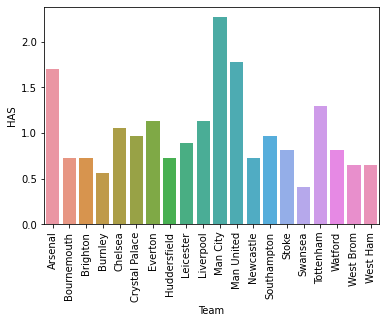

In [65]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [66]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,5,4,0.404858,0.406091,14,8,1.42132,0.647773


In [67]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [68]:
feature_table.head(20)


,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Arsenal,Leicester,H,10,3,1.700405,0.710660,1.624365,1.133603
1,Brighton,Man City,A,2,4,0.728745,1.218274,2.436548,0.404858
2,Chelsea,Burnley,A,6,5,1.052632,0.710660,0.913706,0.728745
3,Crystal Palace,Huddersfield,A,4,6,0.971660,1.522843,0.304569,1.457490
4,Everton,Stoke,H,4,1,1.133603,1.218274,0.913706,1.700405
5,Southampton,Swansea,D,2,0,0.971660,1.421320,0.406091,0.647773
6,Watford,Liverpool,D,4,5,0.809717,1.624365,2.030457,1.376518
7,West Brom,Bournemouth,H,6,2,0.647773,1.218274,0.609137,0.890688
8,Man United,West Ham,H,6,1,1.781377,0.304569,0.609137,1.700405
9,Newcastle,Tottenham,A,3,6,0.728745,1.218274,1.421320,0.647773


In [69]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [70]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [71]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
160,Burnley,Stoke,H,2,7,0.566802,0.304569,0.913706,1.700405,1
161,Crystal Palace,Watford,H,4,2,0.971660,1.522843,1.624365,1.052632,1
162,Huddersfield,Chelsea,A,2,5,0.728745,1.116751,1.827411,0.566802,-1
163,Liverpool,West Brom,D,5,1,1.133603,0.304569,0.406091,0.809717,0
164,Man United,Bournemouth,H,2,7,1.781377,0.304569,0.609137,0.890688,1
165,Newcastle,Everton,A,4,4,0.728745,1.218274,0.710660,1.376518,-1
166,Southampton,Leicester,A,4,11,0.971660,1.421320,1.624365,1.133603,-1
167,Swansea,Man City,A,3,10,0.404858,1.421320,2.436548,0.404858,-1
168,Tottenham,Brighton,H,8,4,1.295547,0.609137,0.507614,0.890688,1
169,West Ham,Arsenal,D,0,3,0.647773,1.116751,0.913706,1.052632,0


In [72]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

In [74]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [75]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.64705882 0.64705882 0.64705882 0.70588235 0.41176471 0.58823529
 0.58823529 0.70588235 0.58823529 0.41176471]
0.5941176470588235


In [76]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.64705882 0.64705882 0.52941176 0.70588235 0.41176471 0.58823529
 0.70588235 0.70588235 0.58823529 0.47058824]
0.6


In [77]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.58823529 0.58823529 0.64705882 0.64705882 0.52941176 0.70588235
 0.64705882 0.64705882 0.64705882 0.47058824]
0.611764705882353


In [78]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.58823529 0.64705882 0.64705882 0.58823529 0.41176471 0.52941176
 0.58823529 0.58823529 0.47058824 0.41176471]
0.5470588235294118


# **Adding Recent Performance**



In [79]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [80]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [81]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Leicester','Man United','D',0,0,0,0,0,0],
                             ['Burnley','Tottenham','D',0,0,0,0,0,0],
                             ['Swansea','Crystal Palace','D',0,0,0,0,0,0],
                             ['West Ham','Newcastle','D',0,0,0,0,0,0],
                             ['Stoke','West Brom','D',0,0,0,0,0,0],
                             ['Southampton','Huddersfield','D',0,0,0,0,0,0],
                             ['Man City','Bournemouth','D',0,0,0,0,0,0],
                             ['Brighton','Watford','D',0,0,0,0,0,0],
                             ['Everton','Chelsea','D',0,0,0,0,0,0],
                             ['Arsenal','Liverpool','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [82]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(180, 9)

In [83]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [84]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
179,Leicester,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
178,Burnley,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
177,Swansea,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
176,West Ham,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
175,Stoke,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
174,Southampton,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
173,Man City,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
172,Brighton,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
171,Everton,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
170,Arsenal,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    At = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    At_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == At) | (feat_table.AwayTeam == At)].head(k)

    feat_table.at[i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k]
    feat_table.at[i, 'pastAC', (At_stats[At_stats["AwayTeam"] == At].sum().HC + At_stats[At_stats["HomeTeam"] == At].sum().HC)/k]
    feat_table.at[i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k]
    feat_table.at[i, 'pastAS', (At_stats[At_stats["AwayTeam"] == At].sum().HS + At_stats[At_stats["HomeTeam"] == At].sum().AS)/k]
    feat_table.at[i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k]
    feat_table.at[i, 'pastAG', (At_stats[At_stats["AwayTeam"] == At].sum().FTAG + At_stats[At_stats["HomeTeam"] == At].sum().FTHG)/k]

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


TypeError: ignored

In [88]:
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

In [89]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [90]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [91]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(180, 19)


170

In [92]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

# **Adding home advantage**

In [93]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [94]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

170


In [95]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Arsenal,Leicester,H,0.0,0.0,0.0,0.0,0.0,0.0,1.700405,0.710660,0.913706,1.052632,1,0.0,0.0,0.0
1,Brighton,Man City,A,0.0,0.0,0.0,0.0,0.0,0.0,0.728745,1.218274,0.507614,0.890688,-1,0.0,0.0,0.0
2,Chelsea,Burnley,A,0.0,0.0,0.0,0.0,0.0,0.0,1.052632,0.710660,1.827411,0.566802,-1,0.0,0.0,0.0
3,Crystal Palace,Huddersfield,A,0.0,0.0,0.0,0.0,0.0,0.0,0.971660,1.522843,0.000000,1.052632,-1,0.0,0.0,0.0
4,Everton,Stoke,H,0.0,0.0,0.0,0.0,0.0,0.0,1.133603,1.218274,0.710660,1.376518,1,0.0,0.0,0.0


In [96]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [97]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
170,0.0,0.0,0.0,1.700405,0.710660,0.913706,1.052632
171,0.0,0.0,0.0,1.133603,1.218274,0.710660,1.376518
172,0.0,0.0,0.0,0.728745,1.218274,0.507614,0.890688
173,0.0,0.0,0.0,2.267206,0.609137,2.436548,0.404858
174,0.0,0.0,0.0,0.971660,1.421320,0.507614,0.728745
175,0.0,0.0,0.0,0.809717,1.522843,0.913706,1.700405
176,0.0,0.0,0.0,0.647773,1.116751,0.609137,1.700405
177,0.0,0.0,0.0,0.404858,1.421320,0.406091,0.647773
178,0.0,0.0,0.0,0.566802,0.304569,0.913706,0.728745
179,0.0,0.0,0.0,0.890688,0.913706,1.624365,1.133603


In [98]:
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)

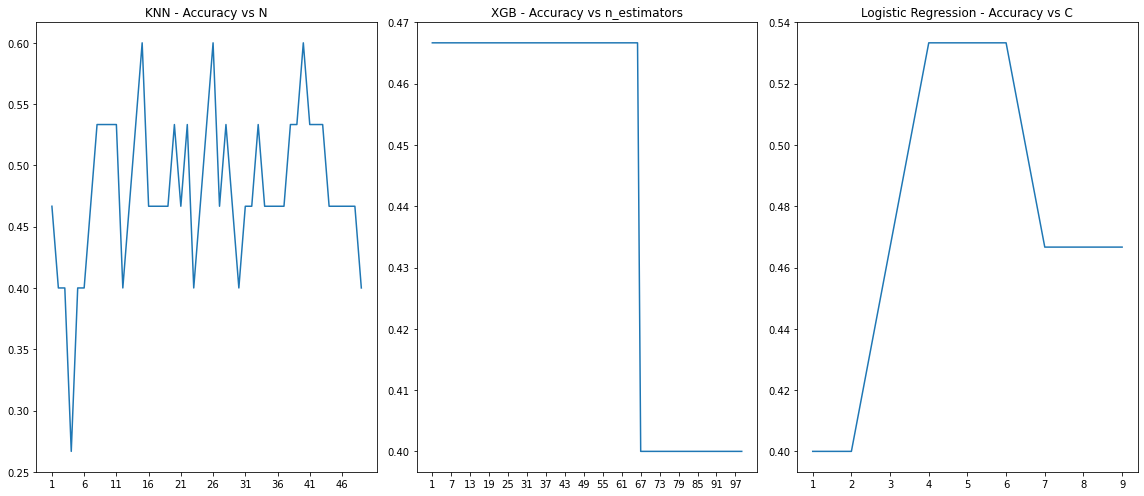

In [99]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [100]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3

0.6 14
0.4666666666666667 1
0.5333333333333333 3


In [101]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [102]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [103]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [104]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
170,Arsenal,Liverpool,1,1,1
171,Everton,Chelsea,1,1,1
172,Brighton,Watford,0,0,-1
173,Man City,Bournemouth,1,1,1
174,Southampton,Huddersfield,0,1,-1
175,Stoke,West Brom,-1,-1,-1
176,West Ham,Newcastle,1,-1,-1
177,Swansea,Crystal Palace,-1,-1,-1
178,Burnley,Tottenham,1,1,1
179,Leicester,Man United,1,1,1


In [105]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [106]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [107]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.6 0.4666666666666667 0.5333333333333333


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
170,Arsenal,Liverpool,H,H,H
171,Everton,Chelsea,H,H,H
172,Brighton,Watford,D,D,A
173,Man City,Bournemouth,H,H,H
174,Southampton,Huddersfield,D,H,A
175,Stoke,West Brom,A,A,A
176,West Ham,Newcastle,H,A,A
177,Swansea,Crystal Palace,A,A,A
178,Burnley,Tottenham,H,H,H
179,Leicester,Man United,H,H,H
